In [ ]:
import udma
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [ ]:
cb = udma.UDMA_CLASS('192.168.1.10', 7)
cb.connect()
cb.log(0)

In [ ]:
def dec2fixed(dec, left, right):
    binary = np.binary_repr(dec, width = (left - right + 1))
    fixed = 0
    for i,j in enumerate(np.arange(left, right - 1, -1)):
        if j<0:
            fixed += int(binary[i]) / (2**(-j))
        else:
            fixed += int(binary[i]) * (2**(j))
    return fixed

In [ ]:
cb.write_reg(0, 1)
cb.write_reg(1, 0)
cb.write_reg(0, 0)

In [ ]:
cb.write_reg(1, 3000000)

In [ ]:
done = cb.read_reg(0)[1][0]
avg1 = cb.read_reg(1)[1][0]
avg2 = cb.read_reg(2)[1][0]
print("Done status = {}. Average reward 1 = {}. Average reward 2 = {}.".format(done, dec2fixed(avg1,4,-11), dec2fixed(avg2,4,-11)))

In [ ]:
cb.write_reg(0, 1)
cb.write_reg(1, 0)
cb.write_reg(0, 0)

In [83]:
max_it = 10000
avg1_arr = np.zeros(max_it)
avg2_arr = np.zeros(max_it)
for i in trange(max_it):
    cb.write_reg(1, i*10)
    while (bin(cb.read_reg(0)[1][0])[-1]=='0'):
        pass
    avg1 = cb.read_reg(1)[1][0]
    avg1_arr[i] = dec2fixed(avg1,4,-11)
    avg2 = cb.read_reg(2)[1][0]   
    avg2_arr[i] = dec2fixed(avg2,4,-11)

100%|██████████| 10000/10000 [20:41<00:00,  8.05it/s]


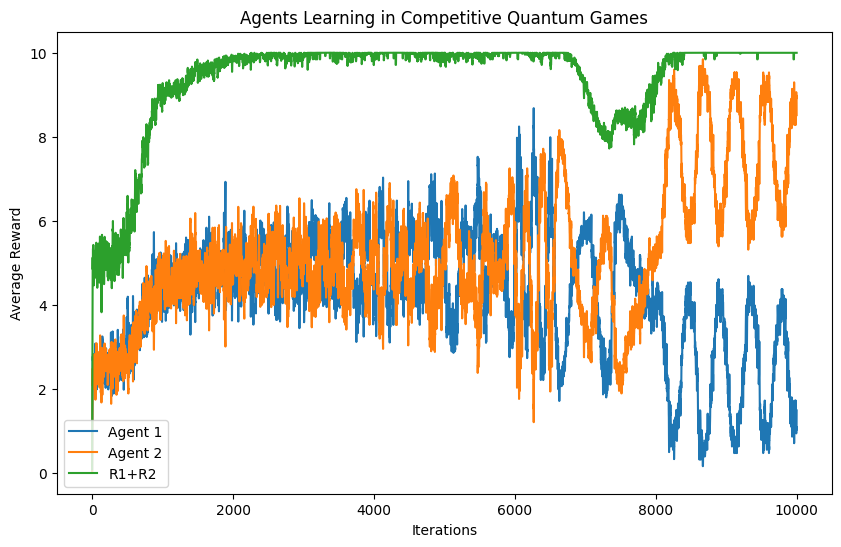

In [90]:
plt.figure(figsize=(10,6))
plt.plot(avg1_arr, label="Agent 1")
plt.plot(avg2_arr, label="Agent 2")
plt.plot(avg1_arr + avg2_arr, label="R1+R2")
plt.title("Agents Learning in Competitive Quantum Games")
plt.legend(loc='lower left')
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.ylim(-0.5, 10.5)
plt.show()